# Supervised learning- tree-based methods + whitening the blackbox

# 0. Loading packages and dataset

In [118]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('real_estate_cleaned.csv')

C:\Users\tomas\AppData\Local\Temp\ipykernel_22504\2606113159.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# 1. Taking a look at the data

In [119]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,restaurants,groceries,nightlife,cafes,...,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition,roof_Gravel/rock,roof_Missing,roof_Other,roof_Shake shingle,basement_1.0,basement_Missing
0,12.597611,1,1,6.371612,2013,8.388054,4.682131,2.302585,3.433987,2.995732,...,0,1,0,0,0,1,0,0,0,1
1,12.285350,1,1,6.418365,1965,8.388054,4.663439,2.772589,1.945910,2.639057,...,0,0,0,1,0,0,0,0,1,0
2,12.542191,1,1,6.423247,1963,8.388054,5.214936,2.639057,3.465736,3.433987,...,0,1,0,0,0,1,0,0,0,1
3,12.847666,1,1,6.428105,2000,10.420554,5.293305,2.302585,3.663562,3.258097,...,0,1,0,0,0,1,0,0,0,1
4,12.736704,1,1,6.453625,1992,8.388054,5.010635,2.079442,3.135494,3.044522,...,0,0,0,0,0,1,0,0,0,1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tx_price                            803 non-null    float64
 1   beds                                803 non-null    int64  
 2   baths                               803 non-null    int64  
 3   sqft                                803 non-null    float64
 4   year_built                          803 non-null    int64  
 5   lot_size                            803 non-null    float64
 6   restaurants                         803 non-null    float64
 7   groceries                           803 non-null    float64
 8   nightlife                           803 non-null    float64
 9   cafes                               803 non-null    float64
 10  shopping                            803 non-null    float64
 11  arts_entertainment                  803 non-n

# 2. Train/test-split

0. Shuffle the dataset (randomize)
1. Split the predictor columns from the response column
2. Perform a train/test split on the dataset
3. Standardize the dataset

In [121]:
# 0. shuffle the dataset
from random import Random
df.iloc[:,25:39] = df.iloc[:,25:39].astype(np.uint8)

df_shuffle = df.sample(frac=1, random_state=40)

# 1. Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X = df_shuffle.drop('tx_price', axis=1)
y = df_shuffle['tx_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 3. Standardize the data
from sklearn.preprocessing import StandardScaler

num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns


scaler = StandardScaler()
scaler.fit(X_train[num_feat])


X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
X_train_stand[num_feat] = scaler.transform(X_train[num_feat])
X_test_stand[num_feat] = scaler.transform(X_test[num_feat])

X_test_stand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 382 to 339
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   beds                                161 non-null    float64
 1   baths                               161 non-null    float64
 2   sqft                                161 non-null    float64
 3   year_built                          161 non-null    float64
 4   lot_size                            161 non-null    float64
 5   restaurants                         161 non-null    float64
 6   groceries                           161 non-null    float64
 7   nightlife                           161 non-null    float64
 8   cafes                               161 non-null    float64
 9   shopping                            161 non-null    float64
 10  arts_entertainment                  161 non-null    float64
 11  beauty_spas                         161 non

C:\Users\tomas\AppData\Local\Temp\ipykernel_22504\1552281093.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,25:39] = df.iloc[:,25:39].astype(np.uint8)


# 3. Decision trees

1. Perform a crossvalidation, using DecisionTreeRegressor, with depth ranging from 1 to 50
  
2. Plot the depth to the R2
    + First do a general plot
    + Then zoom in on the highest values 
    + Which depth leads to the highest R2?

    




1. cross-validation

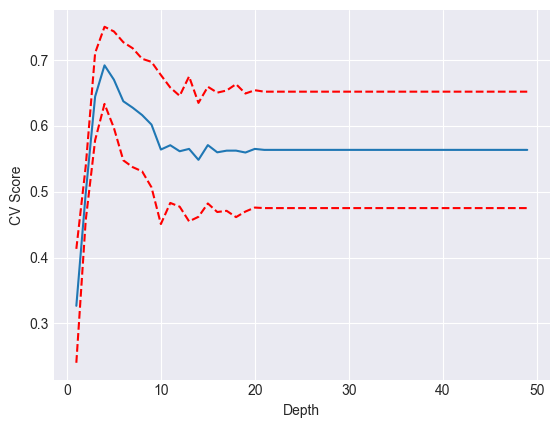

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_score

depth = np.arange(1,50)    # This will give an array of numbers between 1 and 10
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for d in depth:
    dec_tree = DecisionTreeRegressor(random_state = 0, max_depth=d)  
    scores = cross_val_score(dec_tree, X_train_stand, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

plt.plot(depth, cv_scores)
plt.plot(depth, np.array(cv_scores) + 2 * np.array(sd_scores), 'r--')
plt.plot(depth, np.array(cv_scores) - 2 * np.array(sd_scores), 'r--')
plt.xlabel('Depth')
plt.ylabel('CV Score')
plt.show()

2. plots

the best depth is 4


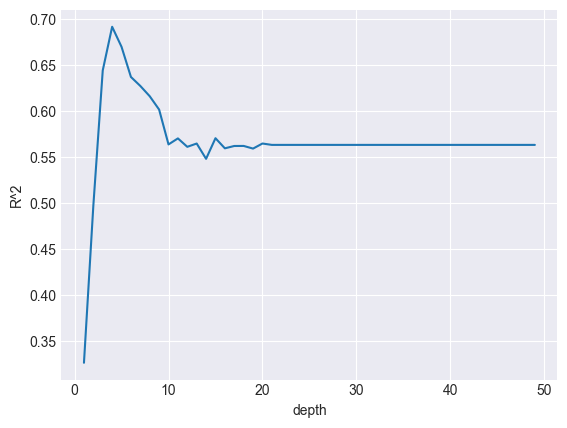

In [123]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(depth, cv_scores)
plt.xlabel('depth')
plt.ylabel('R^2')

print('the best depth is', depth[max_index])

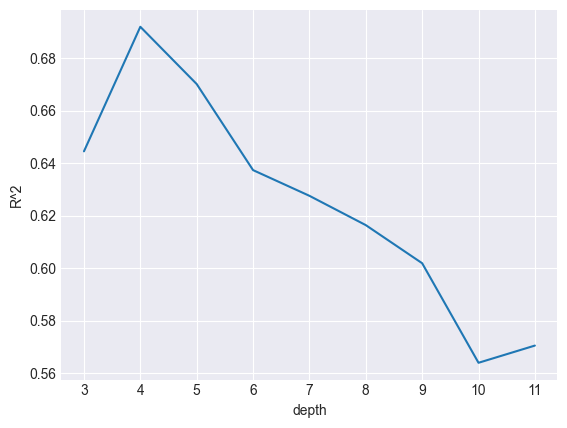

The best depth is 4
The best validation scoer is 0.6919810229308346


In [124]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(depth[2:11], cv_scores[2:11])
plt.xlabel('depth')
plt.ylabel('R^2')

plt.show()
print('The best depth is', depth[max_index])
print('The best validation scoer is', max_value)

In [125]:
from sklearn import tree  
dec_tree = DecisionTreeRegressor(random_state = 0, max_depth=4)  
dec_tree.fit(X_train_stand, y_train) 
print(dec_tree.score(X_train_stand, y_train) )
dec_tree.score(X_test_stand, y_test) 

0.8019433003376794


0.7249312829707326

# 4. Random forest
Let's see if we can improve the previous result (the validated R2) by using random forests. 

1. Perform a  random search cross-validation using  RandomForestRegressor with the following hyperparameters
    + criterion: mse, mae
    + n_estimators: choose 200 values, ranging from 100 to 500
    + max_features: auto, sqrt, log2
    + max_depth: let it range from 1 to 15
    + min_samples_split: let it range from 2 to 15: why not from 1 to 15?
    + min_samples_leaf: let it range from 1 to 15
    + max_leaf_nodes: choose 490 values, ranging from 10 to 500
    
    + use random_state=42
    + use 3 folds
    + fit 100 random models
    
2. Print out the training and validated $R^2$ for the best model from the random search 
 
3. Print out the parameters of the best model
 
4. Plot the results for all hyperparameters
     + First make a general plot for all results and all hyperparameters
     + Then make plots for all hyperparameters, but only the models where the R2 is above 0.7, to get a better idea which parameters you will use in the grid search.
     
5. Perform a grid search. Choose the parameters that you include in this search yourself
      + Since this is just a labo and you do not want to wait hours for the results, limit the choices. For an assignment, you should add more options.
      + print out the best model
    

1. Random search

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion = ['squared_error', 'absolute_error', 'poisson']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 200)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 100)]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

# then do cross-validatoin
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
rf_random.fit(X_train_stand, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\tomas\.virtualenvs\les4_demo_labo-TGZHoNia\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [10, 14, 19, 24, 29,
                                                           34, 39, 44, 49, 54,
                                                           59, 64, 69, 74, 79,
                                                           84, 89, 94, 99, 104,
                                                           108, 113, 118, 123,
                                                           128, 133, 138, 143,
                                                           148, 153, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15],
                                        'n_estimators': [100, 102, 104, 106,
                                                         108, 110, 112, 114,
                                                         116, 118, 120, 122,
                                                         124, 126, 128, 130,
                                                         132, 134, 136, 138,
                                                         140, 142, 144, 146,
                                                         148, 150, 152, 154,
                                                         156, 158, ...]},
                   random_state=42, verbose=2)

2. Print out the training and validated $R^2$ for the best model from the random search 


In [127]:
print(rf_random.score(X_train_stand, y_train))
print(rf_random.best_score_)

0.9281098767790916
0.7940764957981542


3. print out the parameters of the best model

In [128]:
rf_random.best_params_

{'n_estimators': 377,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 198,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'poisson'}

4. Plot the results  for the hyperparameters

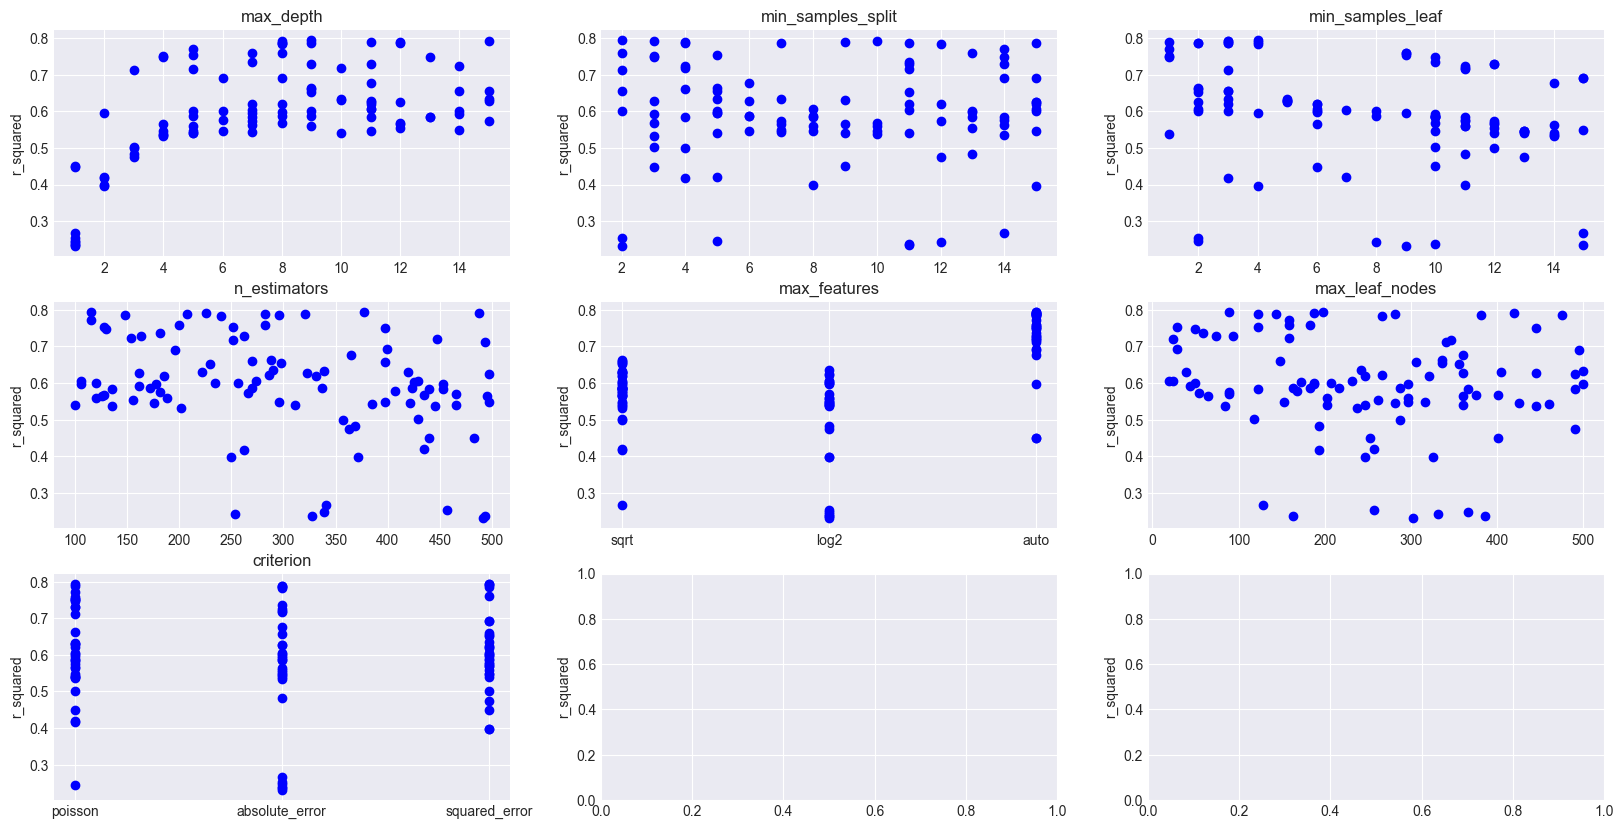

In [129]:
out = pd.DataFrame(rf_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out['param_max_features'], out['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out['param_criterion'], out['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

for ax in axs.flat:
    ax.set(ylabel='r_squared')
    

In [130]:
out = out[out.mean_test_score > 0.7]

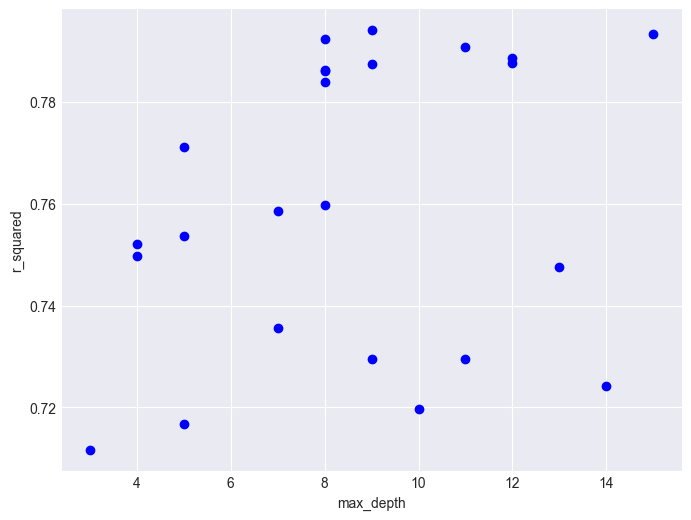

In [131]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_depth");
ax.set_ylabel("r_squared");

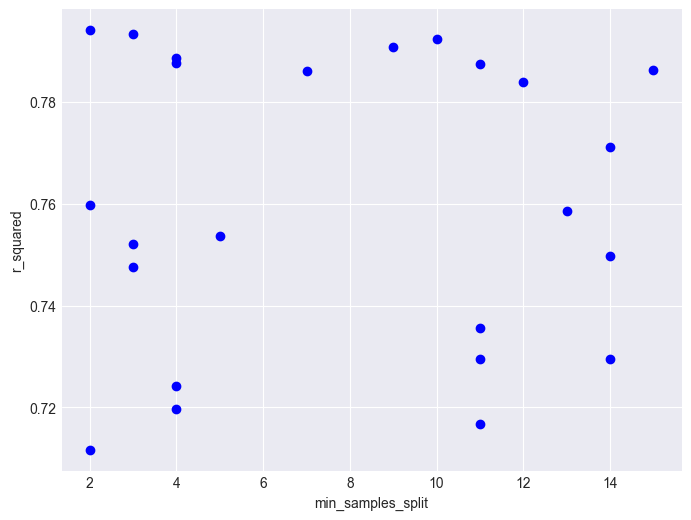

In [132]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
ax.set_xlabel("min_samples_split");
ax.set_ylabel("r_squared");

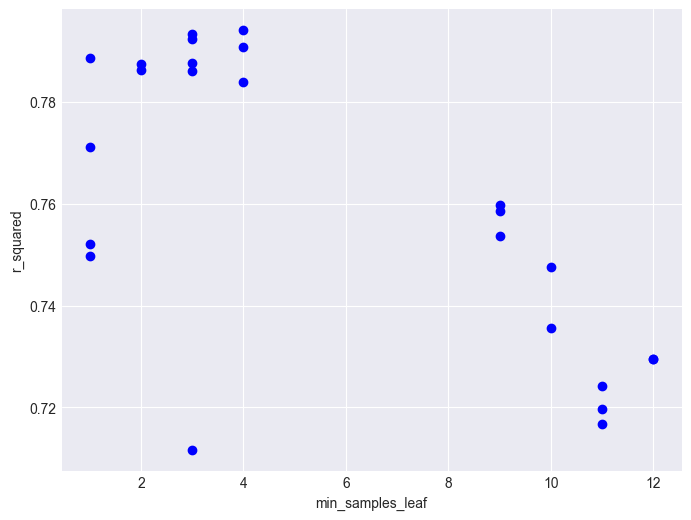

In [133]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
ax.set_xlabel("min_samples_leaf");
ax.set_ylabel("r_squared");

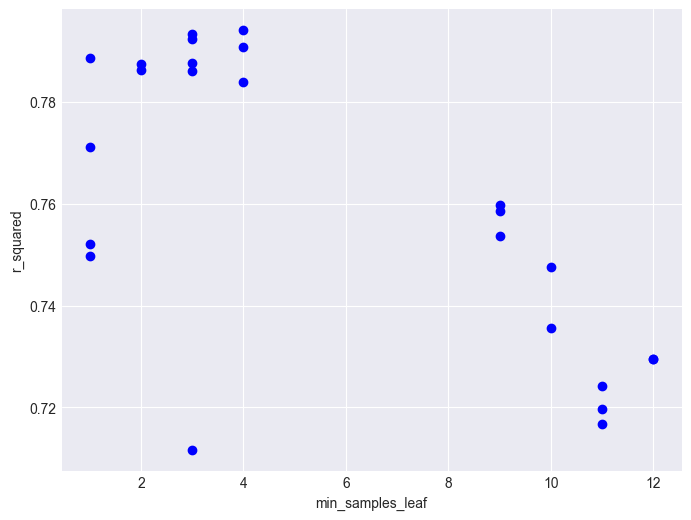

In [134]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
ax.set_xlabel("min_samples_leaf");
ax.set_ylabel("r_squared");

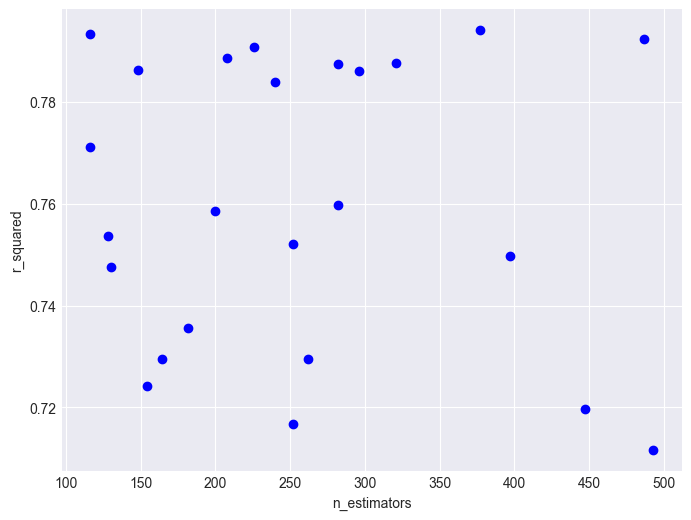

In [135]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
ax.set_xlabel("n_estimators");
ax.set_ylabel("r_squared");

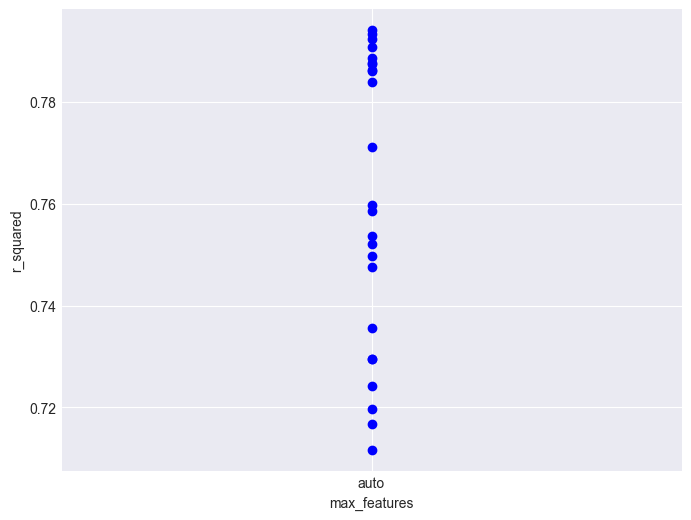

In [136]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_features'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_features");
ax.set_ylabel("r_squared");

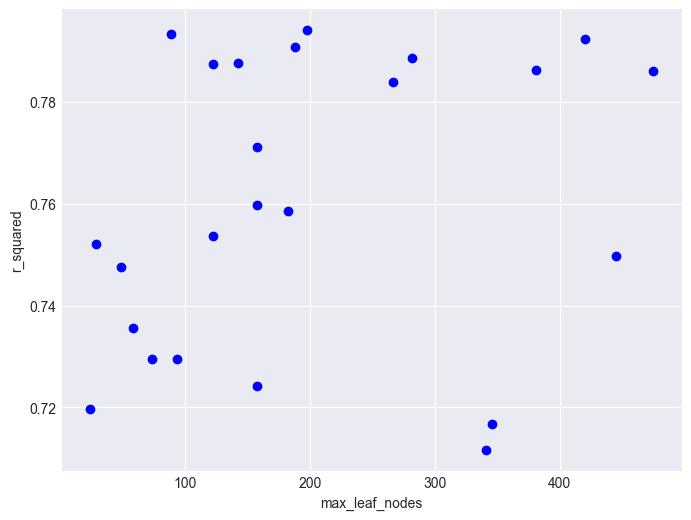

In [137]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_leaf_nodes");
ax.set_ylabel("r_squared");

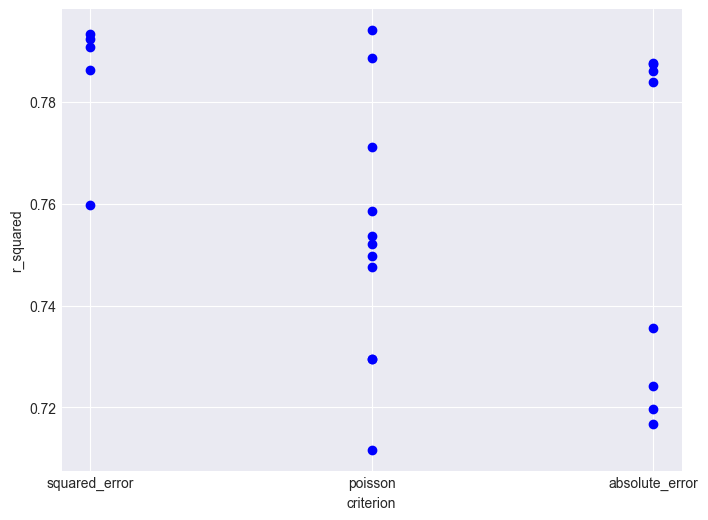

In [138]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_criterion'], out['mean_test_score'], c='blue');
ax.set_xlabel("criterion");
ax.set_ylabel("r_squared");

5. Grid search

In [139]:
# Use grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion = ['absolute_error', 'squared_error', 'poisson', 'friedman_mse']
n_estimators = [230, 232,234]
max_features = ['auto']
max_depth = [7, 8]
min_samples_split = [2,4]
min_samples_leaf = [3,5]
max_leaf_nodes = [60, 290]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
                'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes}
# then do cross-validation
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 5, verbose=2, n_jobs=-1)

# n_jobs=-1 to run as many models  parallel as possible
rf_grid.fit(X_train_stand, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Users\tomas\.virtualenvs\les4_demo_labo-TGZHoNia\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson', 'friedman_mse'],
                         'max_depth': [7, 8], 'max_features': ['auto'],
                         'max_leaf_nodes': [60, 290],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [230, 232, 234]},
             verbose=2)

In [140]:
rf_grid.best_params_

{'criterion': 'poisson',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': 290,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 232}

In [141]:
print('R2: %.3f' % rf_grid.score(X_train_stand, y_train))
print('R2: %.3f' % rf_grid.best_score_)

R2: 0.933
R2: 0.796


# 3. Whitening the black box

Untill now we have focussed on getting a model that performs as best as possible. But let's shift our attention now. How do we interpret these models?
1. Which features are important: Plot the feature importances
    + Which five features are most important?
2. What is the influence of a certain feature?
    + Get the predictions from the random forest.
    + Perform one univariate linear regressions per feature on the predicted values!
        + Use the standardized features and also standardize the predictions, to make the interpretation easier 
    + Look at the direction of the effect for the five most important features
3. Why is a prediction what it is?	
    + Use lime to get an idea of how the prediction of observation 100 was made

1. Plot the feature importances

In [145]:
from matplotlib import pyplot as plt
from random_forest import rf_gridBest

plt.figure(figsize=(20,10))

feat_importances = pd.Series(rf_gridBest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(38).plot(kind='barh')
plt.show()

ModuleNotFoundError: No module named 'random_forest'

In [143]:
plt.figure(figsize=(20,10))

feat_importances.nlargest(20).plot(kind='barh')
plt.show()

NameError: name 'feat_importances' is not defined

<Figure size 2000x1000 with 0 Axes>

2. What is the influence of a certain feature?

+ get the predictions from the random forest.

In [144]:
pred_train = rf_gridBest.predict(X_train_stand)

NameError: name 'rf_gridBest' is not defined

+ Perform one univariate linear regressions per feature on the predicted values!

In [146]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(X_train_stand)
X.columns = X_train.columns
predictors =  X_train.columns
y = np.array((pred_train-pred_train.mean())/np.sqrt(pred_train.var())).reshape(-1, 1)

reg = LinearRegression(normalize=True).fit(X[[predictors[0]]], y)
beta = pd.Series(reg.coef_[0])
names = pd.Series(predictors[0])
for i in np.arange(1,(X.shape[1])):
    reg = LinearRegression(normalize=True).fit(X[[predictors[i]]], y)
    beta_help = pd.Series(reg.coef_[0])
    names_help = pd.Series(predictors[i])
    beta = pd.concat([beta,beta_help], axis=0)
    names = pd.concat([names,names_help], axis=0)
betas = pd.concat([names,beta],axis=1)
betas


NameError: name 'pred_train' is not defined

3. Why is a prediction what it is?


In [ ]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer


# creating the explainer function
explainer = LimeTabularExplainer(X_train_stand.values, mode="regression", feature_names=X_train.columns)

# storing a new observation
i = 100
X_test_stand = pd.DataFrame(X_test_stand)
X_test_stand.columns = X_train.columns

X_observation = X_test_stand.iloc[[i], :]

In [ ]:
# explanation using the random forest model
explanation = explainer.explain_instance(X_observation.values[0], rf_gridBest.predict)
explanation.show_in_notebook(show_table=True, show_all=False) 

# 5. Gradient boosting
Let's try one last algorithm for regression. 

1. Perform a  random search cross-validation using  GradientBoostingRegressor with the following hyperparameters
    + criterion: mse, mae
    + n_estimators: choose 50 values, ranging from 100 to 500
    + max_features: auto, sqrt, log2
    + max_depth: let it range from 1 to 15
    + min_samples_split: let it range from 2 to 15: why not from 1 to 15?
    + min_samples_leaf: let it range from 1 to 15
    + max_leaf_nodes: choose 50 values, ranging from 10 to 500
    + loss: ls, lad, huber, quantile
    + learning_rate = choose 10 values, ranging from 0.01 to 1
    
    + use random_state=42
    + use 3 folds
    + fit 100 random models
    
2. Print out the training and validated $R^2$ for the best model from the random search 
 
3. Print out the parameters of the best model
 
4. Plot the results for all hyperparameters
     + First make a general plot for all results and all hyperparameters
     + Then make plots for all hyperparameters, but only the models where the R2 is above 0.7, to get a better idea which parameters you will use in the grid search.
     
5. Perform a grid search. Choose the parameters that you include in this search yourself
      + Since this is just a labo and you do not want to wait hours for the results, limit the choices. For an assignment, you could add more options.
      + print out the best model
    

1. Perform random search

In [147]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

criterion =['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 50)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 50)]
loss = ['ls','lad','huber','quantile']
learning_rate = [round(x,5) for x in np.linspace(0.1, 1, num = 10)]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes,
               'loss': loss,
               'learning_rate': learning_rate}

# then do cross-validation
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs=-1)
X_train_stand.info()
#gbm_random.fit(X_train_stand, y_train)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 479 to 69
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   beds                                642 non-null    float64
 1   baths                               642 non-null    float64
 2   sqft                                642 non-null    float64
 3   year_built                          642 non-null    float64
 4   lot_size                            642 non-null    float64
 5   restaurants                         642 non-null    float64
 6   groceries                           642 non-null    float64
 7   nightlife                           642 non-null    float64
 8   cafes                               642 non-null    float64
 9   shopping                            642 non-null    float64
 10  arts_entertainment                  642 non-null    float64
 11  beauty_spas                         642 non-

2. Test best model

In [148]:
print(gbm_random.score(X_train_stand, y_train))
gbm_random.best_score_


NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

3. print out the parameters of the best model

In [ ]:
gbm_random.best_params_

4. Plot the results of the hyperparameters

In [ ]:
out = pd.DataFrame(gbm_random.cv_results_)
out.head()

In [ ]:
out2 = out

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_max_features'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out2['param_max_leaf_nodes'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out2['param_criterion'], out2['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

axs[2,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[2,1].set_title('learning_rate')

axs[2,2].scatter(out2['param_loss'], out2['mean_test_score'], c='blue');
axs[2,2].set_title('loss')


for ax in axs.flat: ax.set(ylabel='r_squared')

In [ ]:
out2 = out[out.mean_test_score > 0.7]


xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_max_features'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out2['param_max_leaf_nodes'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out2['param_criterion'], out2['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

axs[2,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[2,1].set_title('learning_rate')

axs[2,2].scatter(out2['param_loss'], out2['mean_test_score'], c='blue');
axs[2,2].set_title('loss')


for ax in axs.flat: ax.set(ylabel='r_squared')
    

5. Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['mse']
n_estimators = [214, 251]
max_features = ['auto']
max_depth = [3,5]
min_samples_split = [9]
min_samples_leaf = [7,9]
max_leaf_nodes = [198,410]
learning_rate = [0.09,0.1,0.11,0.12,0.13]
loss = ['lad']

# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
            'max_leaf_nodes': max_leaf_nodes,
               'learning_rate': learning_rate,
               'loss':loss}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = grid,
                               cv = 5, verbose=2,  n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
gbm_grid.fit(X_train_stand, y_train)

In [ ]:
gbm_grid.best_params_

In [ ]:
print(gbm_random.score(X_train_stand, y_train))
gbm_random.best_score_

# 6. Final evaluation
+ Choose the model with the best validated score from this labo
+ Retrain the model on the whole training set
+ Evaluate on the test set

In [ ]:
params = gbm_grid.best_params_
gbm_gridBest = GradientBoostingRegressor(**params)
gbm_gridBest.fit(X_train, y_train)
print(gbm_gridBest.score(X_train, y_train))
print(gbm_gridBest.score(X_test, y_test))

In [ ]:
np.logspace(0.01,1,10) # logaritmic scale

In [ ]:
np.linspace(0.01,1,10) # linear scale